# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # for date plotting capabilities

In [ ]:
# # register date converters to avoid warning message
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [ ]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [ ]:
# shape of tesla df
df_tesla.shape

(124, 3)

In [ ]:
# name of columns
for column in df_tesla.columns: print(column) 

MONTH
TSLA_WEB_SEARCH
TSLA_USD_CLOSE


In [ ]:
print(df_tesla.head())
print(df_tesla.tail())

        MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0  2010-06-01                3           4.766
1  2010-07-01                3           3.988
2  2010-08-01                2           3.896
3  2010-09-01                2           4.082
4  2010-10-01                2           4.368
          MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
119  2020-05-01               16      167.000000
120  2020-06-01               17      215.962006
121  2020-07-01               24      286.152008
122  2020-08-01               23      498.320007
123  2020-09-01               31      407.339996


In [ ]:
print(f'Largest value for Tesla in Web Search: ', df_tesla.TSLA_WEB_SEARCH.max())
print(f'Smallest value for Tesla in Web Search: ', df_tesla.TSLA_WEB_SEARCH.min())

Largest value for Tesla in Web Search:  31
Smallest value for Tesla in Web Search:  2


In [ ]:
# describe(): Generate descriptive statistics of the data in the DataFrame
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [ ]:
# shape of Unemployment data
print(df_unemployment.shape)
print(df_unemployment.head())
print(df_unemployment.tail())
df_unemployment.describe()

(181, 3)
     MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0  2004-01                      34     5.7
1  2004-02                      33     5.6
2  2004-03                      25     5.8
3  2004-04                      29     5.6
4  2004-05                      23     5.6
       MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
176  2018-09                      14     3.7
177  2018-10                      15     3.8
178  2018-11                      16     3.7
179  2018-12                      17     3.9
180  2019-01                      21     4.0


,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


In [ ]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: ', df_unemployment.UE_BENEFITS_WEB_SEARCH.max())

Largest value for "Unemployemnt Benefits" in Web Search:  100


### Bitcoin

In [ ]:
# explore bitcoin search df
print(df_btc_search.shape)
print(df_btc_search.head())
print(df_btc_search.tail())
df_btc_search.describe()

(73, 2)
     MONTH  BTC_NEWS_SEARCH
0  2014-09                5
1  2014-10                4
2  2014-11                4
3  2014-12                4
4  2015-01                5
      MONTH  BTC_NEWS_SEARCH
68  2020-05               22
69  2020-06               13
70  2020-07               14
71  2020-08               16
72  2020-09               13


,BTC_NEWS_SEARCH
count,73.000000
mean,15.013699
std,15.146959
min,3.000000
25%,5.000000
50%,14.000000
75%,18.000000
max,100.000000


In [ ]:
print(f'largest BTC News Search: ', df_btc_search.BTC_NEWS_SEARCH.max())

largest BTC News Search:  100


In [ ]:
# Bitcoin price df
print(df_btc_price.shape)
print(df_btc_price.head())
print(df_btc_price.tail())
df_btc_price.describe()

(2204, 3)
         DATE       CLOSE      VOLUME
0  2014-09-17  457.334015  21056800.0
1  2014-09-18  424.440002  34483200.0
2  2014-09-19  394.795990  37919700.0
3  2014-09-20  408.903992  36863600.0
4  2014-09-21  398.821014  26580100.0
            DATE         CLOSE        VOLUME
2199  2020-09-24  10745.548828  2.301754e+10
2200  2020-09-25  10702.290039  2.123255e+10
2201  2020-09-26  10754.437500  1.810501e+10
2202  2020-09-27  10774.426758  1.801688e+10
2203  2020-09-28  10912.536133  2.122653e+10


,CLOSE,VOLUME
count,2203.000000,2.203000e+03
mean,4429.421245,8.043622e+09
std,4148.150071,1.176529e+10
min,178.102997,5.914570e+06
25%,433.629502,6.029915e+07
50%,3637.520020,2.018890e+09
75%,7997.372803,1.322478e+10
max,19497.400391,7.415677e+10


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [ ]:
print(f'Missing values for Tesla?: ', df_tesla.isna().values.any())
print(f'Missing values for U/E?: ', df_unemployment.isna().values.any())
print(f'Missing values for BTC Search?: ', df_btc_search.isna().values.any())

Missing values for Tesla?:  False
Missing values for U/E?:  False
Missing values for BTC Search?:  False


In [ ]:
print(f'Missing values for BTC price?: ', df_btc_price.isna().values.any())

Missing values for BTC price?:  True


In [ ]:
print(f'Number of missing values: ',df_btc_price.isna().values.sum())

Number of missing values:  2


In [ ]:
# show number of rows with missing values
df_btc_price.isnull().any(axis = 1).sum()

1

In [ ]:
# show the row with missing values
df_btc_price[df_btc_price.isnull().any(axis=1)]

,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [ ]:
# remove rows with missing values
# The inplace argument allows to overwrite our DataFrame and means we don't have to write: df_btc_price = df_btc_price.dropna()
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [ ]:
# check the datatype of month/date
print("Tesla df:", df_tesla.MONTH[0], type(df_tesla.MONTH[0]))
print("Unemployment df:", df_unemployment.MONTH[0], type(df_unemployment.MONTH[0]))
print("Bitcoin Search df:", df_btc_search.MONTH[0], type(df_btc_search.MONTH[0]))
print("Bitcoin Price df:", df_btc_price.DATE[0], type(df_btc_price.DATE[0]))

Tesla df: 2010-06-01 <class 'str'>
Unemployment df: 2004-01 <class 'str'>
Bitcoin Search df: 2014-09 <class 'str'>
Bitcoin Price df: 2014-09-17 <class 'str'>


In [ ]:
# convert the str datatype into datetime objects
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [ ]:
# check the datatype of month/date
print("Tesla df:", df_tesla.MONTH[0], type(df_tesla.MONTH[0]))
print("Unemployment df:", df_unemployment.MONTH[0], type(df_unemployment.MONTH[0]))
print("Bitcoin Search df:", df_btc_search.MONTH[0], type(df_btc_search.MONTH[0]))
print("Bitcoin Price df:", df_btc_price.DATE[0], type(df_btc_price.DATE[0]))

Tesla df: 2010-06-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Unemployment df: 2004-01-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Bitcoin Search df: 2014-09-01 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
Bitcoin Price df: 2014-09-17 00:00:00 <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [ ]:
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [ ]:
print(df_btc_price.shape)

(2203, 3)


In [ ]:
# rule is the sample frequency, we want montly frequency, so we use 'M' here
# some other example: 'Y' for yearly or 'T' for minute
# list of differenct option for time series data frequency: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects

# on: specify is which column to use: DATE column

# we want the last available price of the month - the price at month-end. so we use last()
# if we want to find the average  price over the course of the month, use: mean()
df_btc_price_monthly = df_btc_price.resample(rule="M", on="DATE").last()

In [ ]:
print(df_btc_price_monthly.shape)
df_btc_price_monthly.head()

(73, 3)


,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


# Data Visualisation

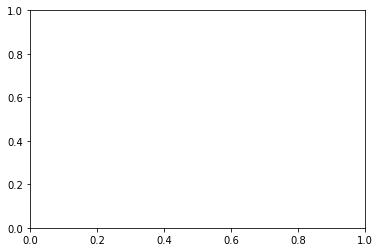

In [ ]:
# Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes.
axis_1 = plt.gca()  # get the axes

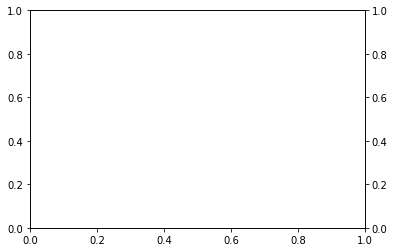

In [ ]:
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

### Notebook Formatting & Style Helpers

In [ ]:
# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter(fmt="%Y")

In [ ]:
# Register date converters to avoid warning messages
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

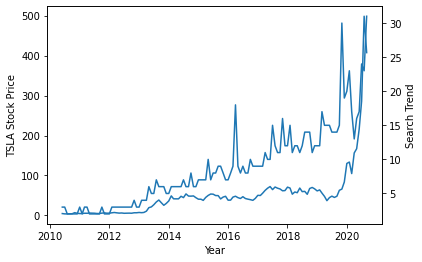

In [ ]:
axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year")
axis_1.set_ylabel(ylabel="TSLA Stock Price")
axis_2.set_ylabel(ylabel="Search Trend")

axis_1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
axis_2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

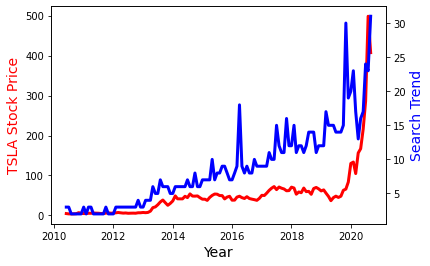

In [ ]:
axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year", fontsize=14)
axis_1.set_ylabel(ylabel="TSLA Stock Price", color="r", fontsize=14)
axis_2.set_ylabel(ylabel="Search Trend", color="b", fontsize=14)

axis_1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="r", linewidth=3)
axis_2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="b", linewidth=3)

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

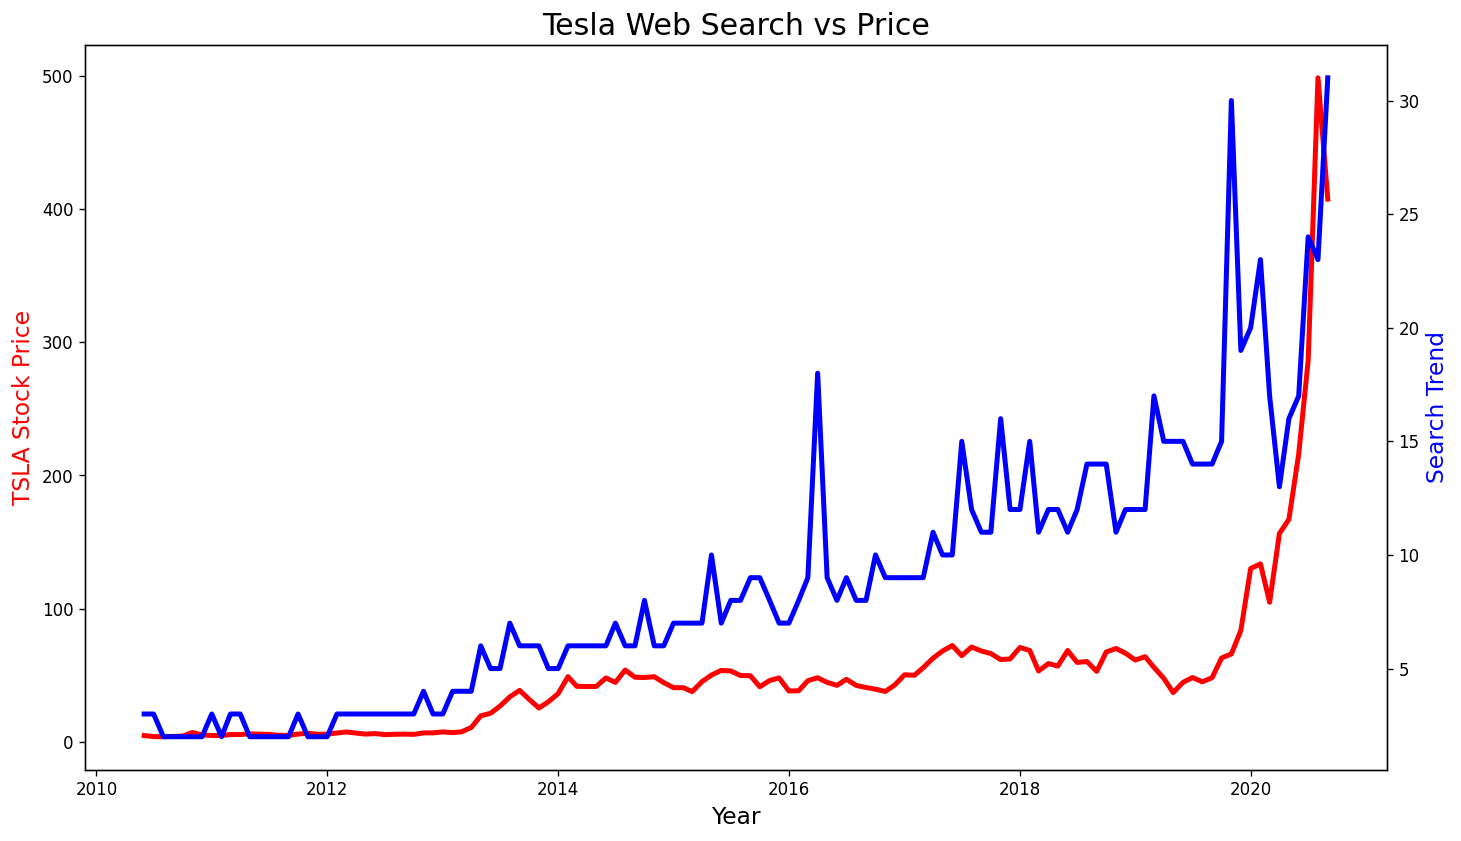

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year", fontsize=14)
axis_1.set_ylabel(ylabel="TSLA Stock Price", color="r", fontsize=14)
axis_2.set_ylabel(ylabel="Search Trend", color="b", fontsize=14)

axis_1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="r", linewidth=3)
axis_2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="b", linewidth=3)

# Displays chart explicitly
plt.show()

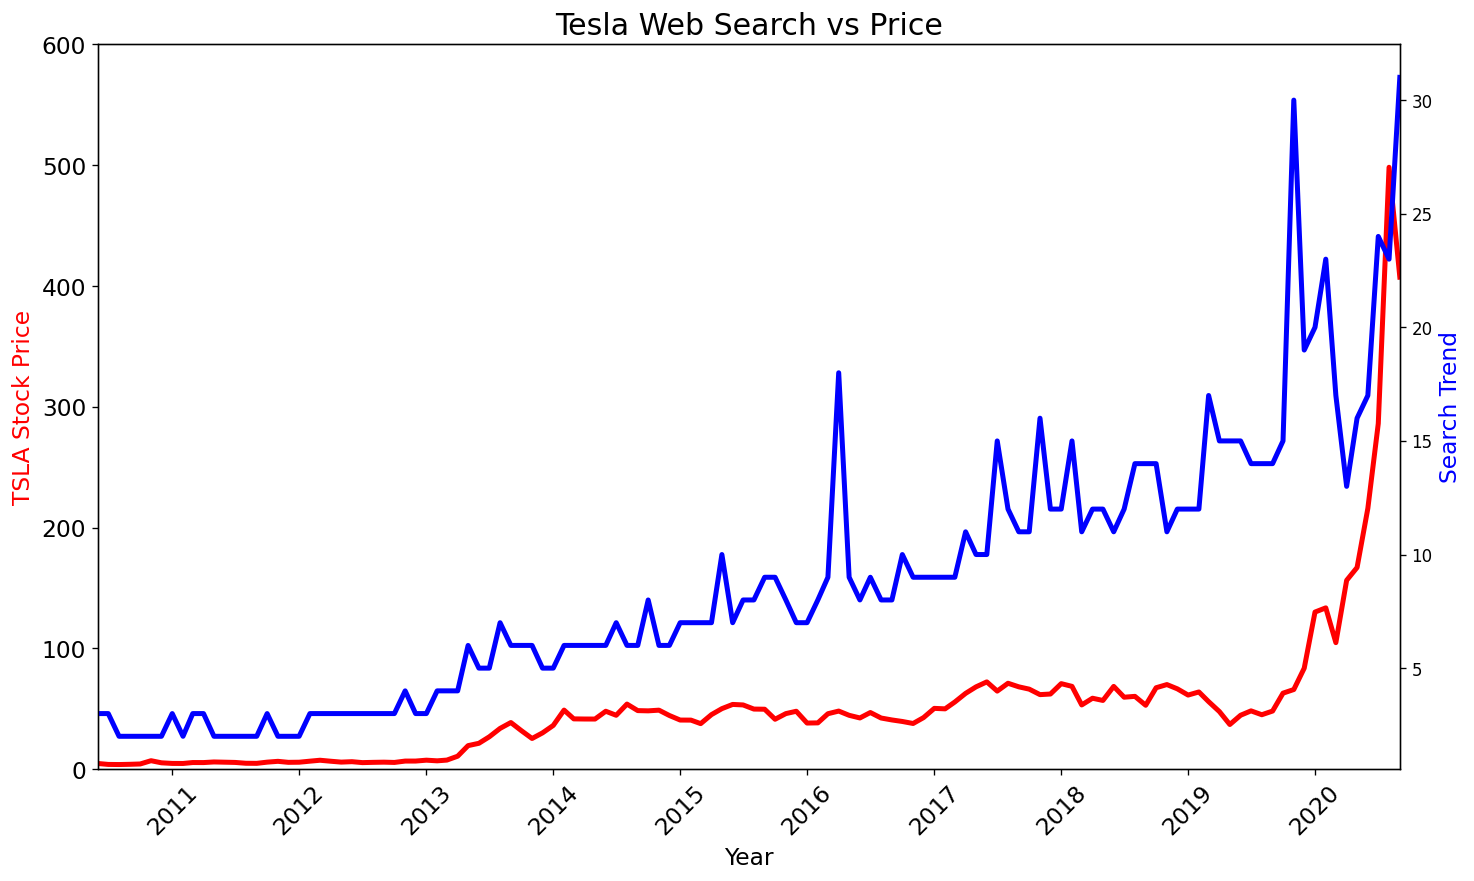

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year", fontsize=14)
axis_1.set_ylabel(ylabel="TSLA Stock Price", color="r", fontsize=14)
axis_2.set_ylabel(ylabel="Search Trend", color="b", fontsize=14)

# Set the minimum and maximum values on the axes
axis_1.set_ylim([0, 600])
axis_1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

axis_1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="r", linewidth=3)
axis_2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="b", linewidth=3)

# Displays chart explicitly
plt.show()

How to add tick formatting for dates on the x-axis. 

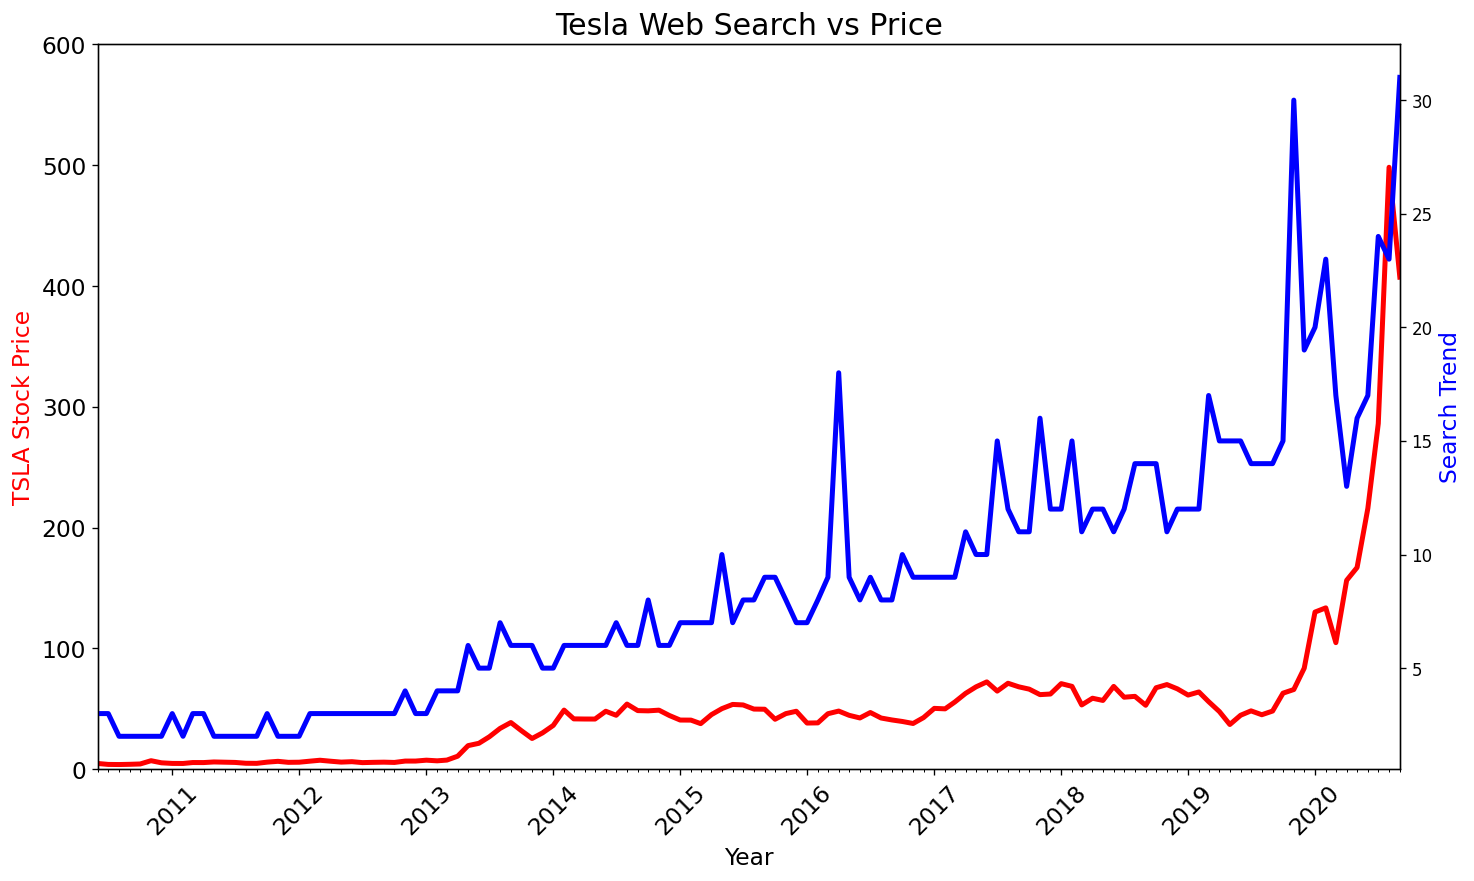

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# format the ticks
axis_1.xaxis.set_major_locator(years)
axis_1.xaxis.set_major_formatter(years_fmt)
axis_1.xaxis.set_minor_locator(months)

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year", fontsize=14)
axis_1.set_ylabel(ylabel="TSLA Stock Price", color="r", fontsize=14)
axis_2.set_ylabel(ylabel="Search Trend", color="b", fontsize=14)

# Set the minimum and maximum values on the axes
axis_1.set_ylim([0, 600])
axis_1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

axis_1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color="r", linewidth=3)
axis_2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color="b", linewidth=3)

# Displays chart explicitly
plt.show()

### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

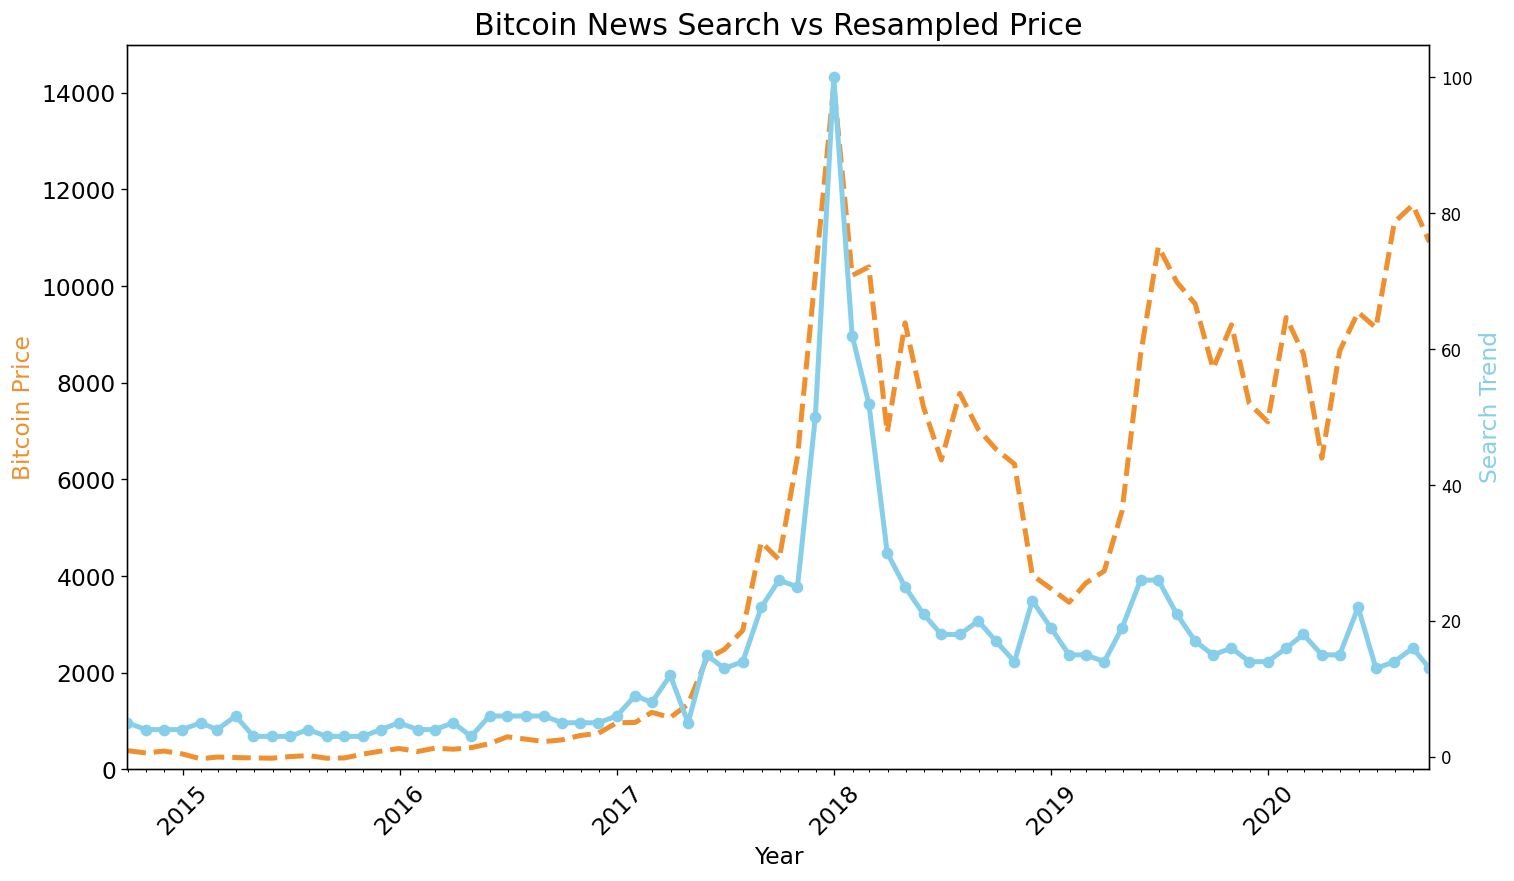

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# format the ticks
axis_1.xaxis.set_major_locator(years)
axis_1.xaxis.set_major_formatter(years_fmt)
axis_1.xaxis.set_minor_locator(months)

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year", fontsize=14)
axis_1.set_ylabel(ylabel="Bitcoin Price", color="#F08F2E", fontsize=14)
axis_2.set_ylabel(ylabel="Search Trend", color="skyblue", fontsize=14)

# Set the minimum and maximum values on the axes
axis_1.set_ylim(bottom=0, top=15000)
axis_1.set_xlim([df_btc_price_monthly.DATE.min(), df_btc_price_monthly.DATE.max()])
# axis_2.set_ylim(bottom=0, top=100)

# bitcoin price vs year
# linestyle: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
axis_1.plot(df_btc_price_monthly.DATE, df_btc_price_monthly.CLOSE, color="#F08F2E", linewidth=3, linestyle="dashed")

# bitcoin news search vs year
# markers: https://matplotlib.org/3.2.1/api/markers_api.html
axis_2.plot(df_btc_price_monthly.DATE, df_btc_search.BTC_NEWS_SEARCH, color="skyblue", linewidth=3, marker="o")

# Displays chart explicitly
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [ ]:
print(df_unemployment.describe())
print(df_unemployment.head())

       UE_BENEFITS_WEB_SEARCH      UNRATE
count              181.000000  181.000000
mean                35.110497    6.217680
std                 20.484925    1.891859
min                 14.000000    3.700000
25%                 21.000000    4.700000
50%                 26.000000    5.400000
75%                 45.000000    7.800000
max                100.000000   10.000000
       MONTH  UE_BENEFITS_WEB_SEARCH  UNRATE
0 2004-01-01                      34     5.7
1 2004-02-01                      33     5.6
2 2004-03-01                      25     5.8
3 2004-04-01                      29     5.6
4 2004-05-01                      23     5.6


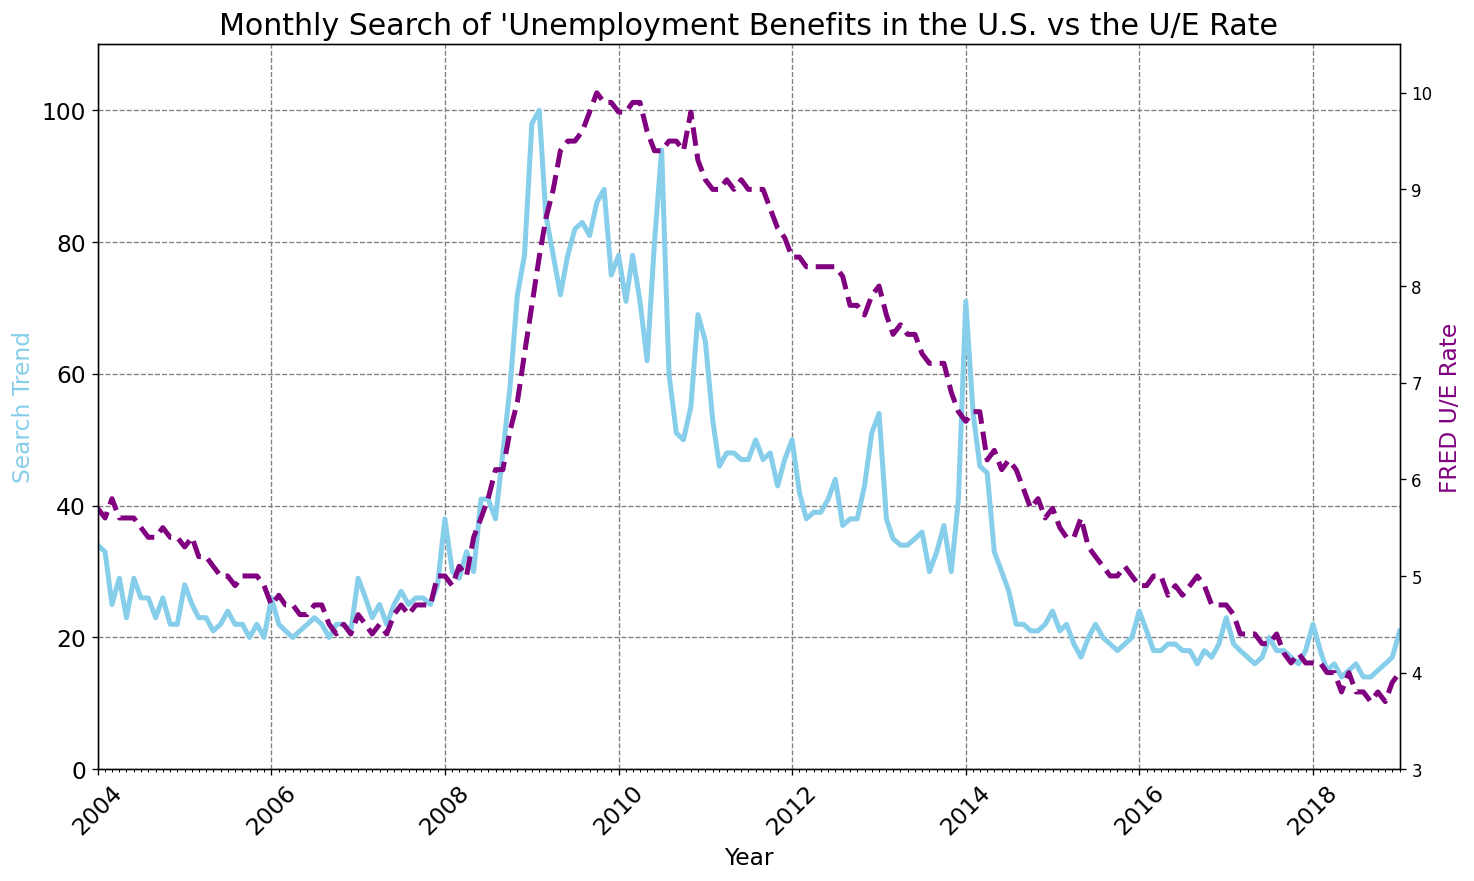

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title("Monthly Search of 'Unemployment Benefits in the U.S. vs the U/E Rate", fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# format the ticks
axis_1.xaxis.set_major_locator(years)
axis_1.xaxis.set_major_formatter(years_fmt)
axis_1.xaxis.set_minor_locator(months)

# enable the grids
# grid: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html
axis_1.grid(color="grey", linestyle="--")

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year", fontsize=14)
axis_1.set_ylabel(ylabel="Search Trend", color="skyblue", fontsize=14)
axis_2.set_ylabel(ylabel="FRED U/E Rate", color="purple", fontsize=14)

# Set the minimum and maximum values on the axes
axis_1.set_ylim(bottom=0, top=110)
axis_1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
axis_2.set_ylim(bottom=3, top=10.5)

# UE benefits web search vs year
# linestyle: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
axis_1.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3)

# UE Rate vs year
# markers: https://matplotlib.org/3.2.1/api/markers_api.html
axis_2.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color="purple", linewidth=3, linestyle="--")

# Displays chart explicitly
plt.show()

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


In [ ]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


In [ ]:
# rolling the df
df_roll_ue = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
df_roll_ue.head(10)

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,28.833333,5.650000
6,27.500000,5.616667
7,26.333333,5.583333
8,26.000000,5.516667
9,25.500000,5.500000


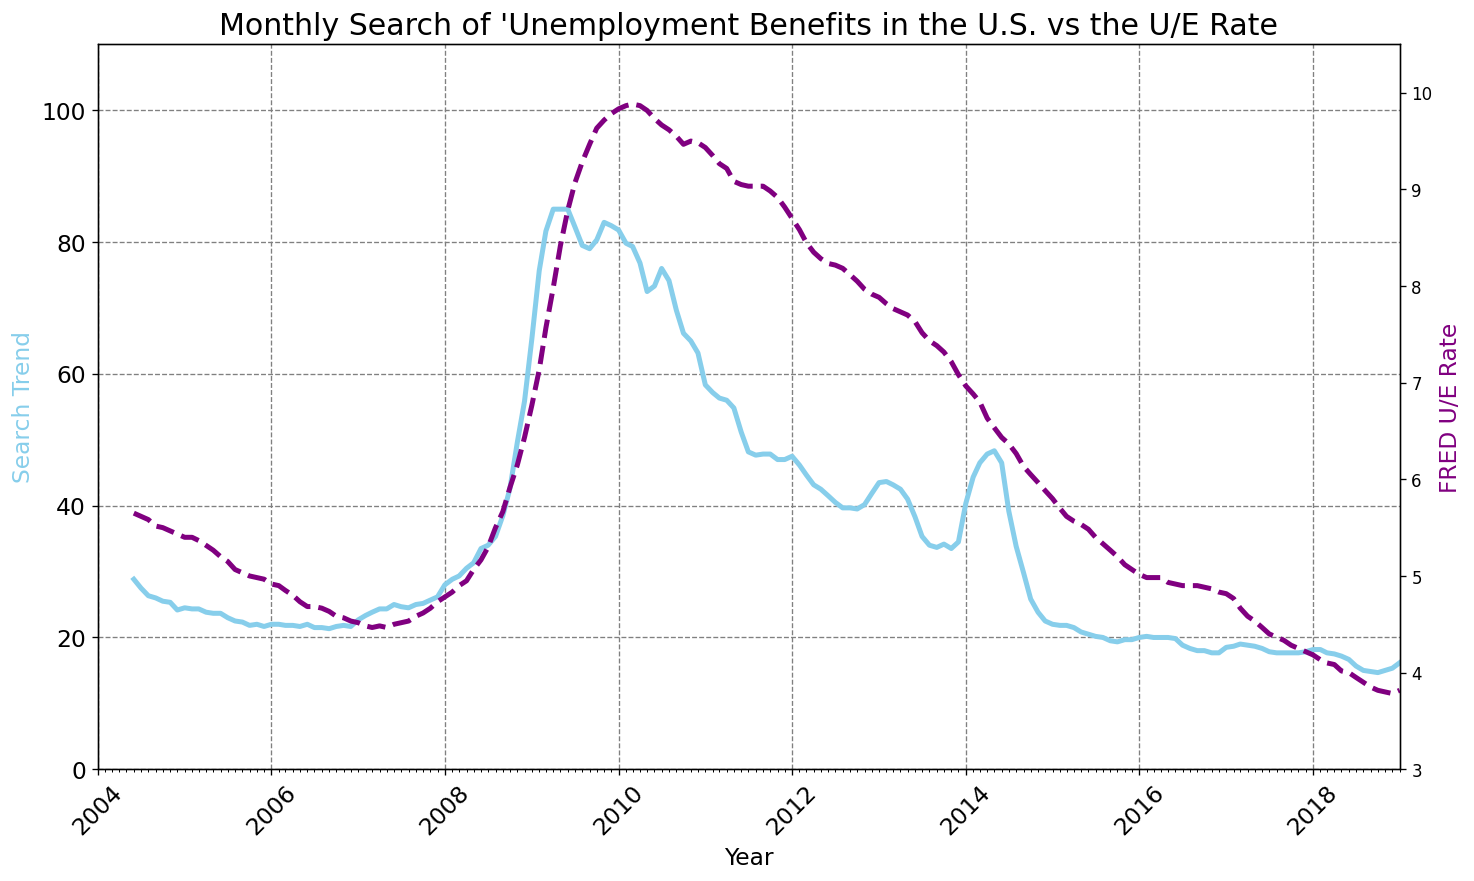

In [ ]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title("Rolling Monthly Search of 'Unemployment Benefits in the U.S. vs the U/E Rate", fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# format the ticks
axis_1.xaxis.set_major_locator(years)
axis_1.xaxis.set_major_formatter(years_fmt)
axis_1.xaxis.set_minor_locator(months)

# enable the grids
# grid: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html
axis_1.grid(color="grey", linestyle="--")

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year", fontsize=14)
axis_1.set_ylabel(ylabel="Search Trend", color="skyblue", fontsize=14)
axis_2.set_ylabel(ylabel="FRED U/E Rate", color="purple", fontsize=14)

# Set the minimum and maximum values on the axes
axis_1.set_ylim(bottom=0, top=110)
axis_1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])
axis_2.set_ylim(bottom=3, top=10.5)

# UE benefits web search vs year
# linestyle: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
axis_1.plot(df_unemployment.MONTH, df_roll_ue.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3)

# UE Rate vs year
# markers: https://matplotlib.org/3.2.1/api/markers_api.html
axis_2.plot(df_unemployment.MONTH, df_roll_ue.UNRATE, color="purple", linewidth=3, linestyle="--")

# Displays chart explicitly
plt.show()

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [ ]:
# creating the df
df_ue_2020 = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [ ]:
# convert the month column to pandas datetime object
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)
print(type(df_ue_2020.MONTH[0]))
df_ue_2020.MONTH.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

In [ ]:
df_ue_2020.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,200.000000,200.000000
mean,10.315000,6.173000
std,10.778061,2.128267
min,4.000000,3.500000
25%,5.000000,4.600000
50%,7.000000,5.400000
75%,12.000000,7.825000
max,100.000000,14.700000


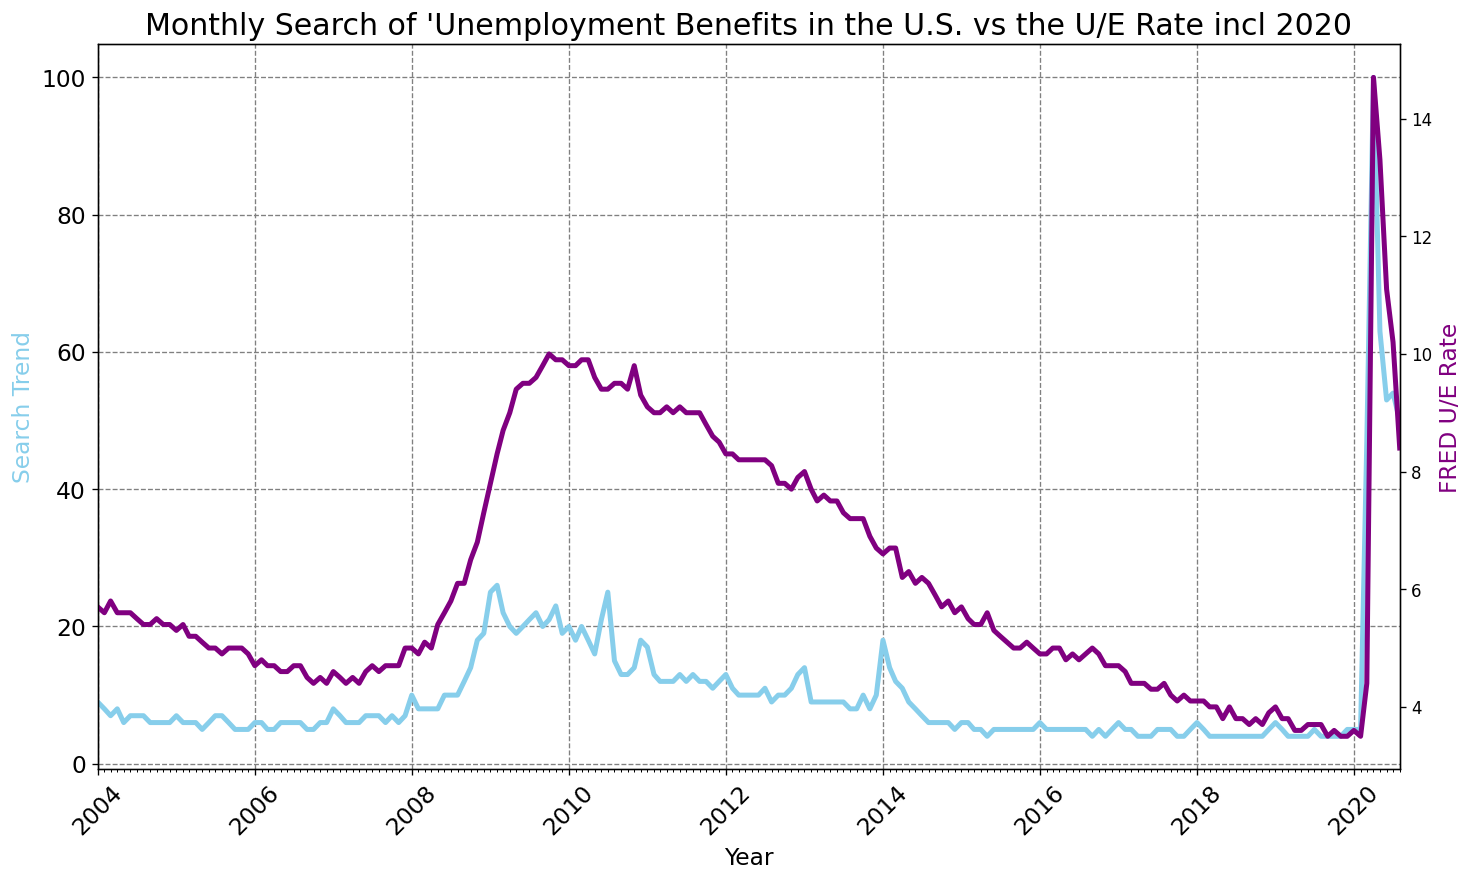

In [98]:
# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title("Monthly Search of 'Unemployment Benefits in the U.S. vs the U/E Rate incl 2020", fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

axis_1 = plt.gca()  # get the axes
axis_2 = plt.twinx()  # create another axis that shares the smae x axis

# format the ticks
axis_1.xaxis.set_major_locator(years)
axis_1.xaxis.set_major_formatter(years_fmt)
axis_1.xaxis.set_minor_locator(months)

# enable the grids
# grid: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html
axis_1.grid(color="grey", linestyle="--")

# list of named colors: https://matplotlib.org/3.1.1/gallery/color/named_colors.html
axis_1.set_xlabel(xlabel="Year", fontsize=14)
axis_1.set_ylabel(ylabel="Search Trend", color="skyblue", fontsize=14)
axis_2.set_ylabel(ylabel="FRED U/E Rate", color="purple", fontsize=14)

# Set the minimum and maximum values on the axes
# axis_1.set_ylim(bottom=0, top=110)
axis_1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
# axis_2.set_ylim(bottom=3, top=10.5)

# UE benefits web search vs year
# linestyle: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html
axis_1.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, color="skyblue", linewidth=3)

# UE Rate vs year
# markers: https://matplotlib.org/3.2.1/api/markers_api.html
axis_2.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, color="purple", linewidth=3)

# Displays chart explicitly
plt.show()